Dataset shape: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

d:\AI mid\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)


Training Neural Network...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Neural Network Accuracy: 81.56%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       105
           1       0.85      0.68      0.75        74

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179


MODEL COMPARISON
Logistic Regression Accuracy: 79.89%
Neural Network Accuracy: 81.56%


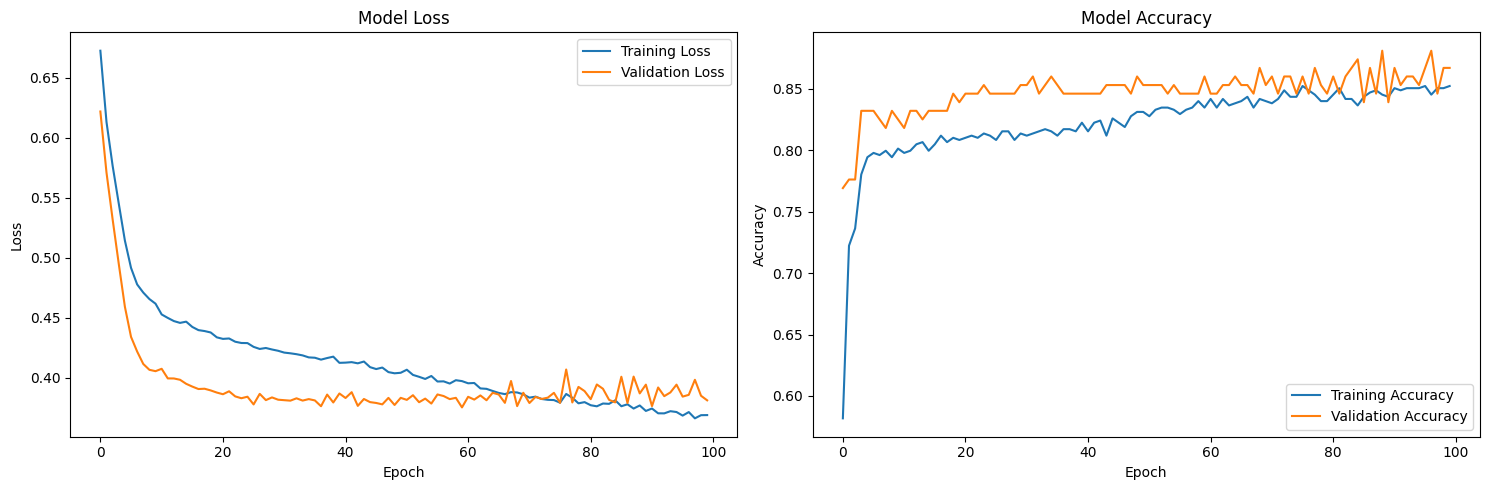


Feature Importance (Logistic Regression):
  feature  importance
4     Age    1.734037
8  female    1.355012
9    male    1.285056
3  Pclass    0.931545
7    Fare    0.547011
2       S    0.355567
5   SibSp    0.266790
0       C    0.130433
6   Parch    0.090196
1       Q    0.057177


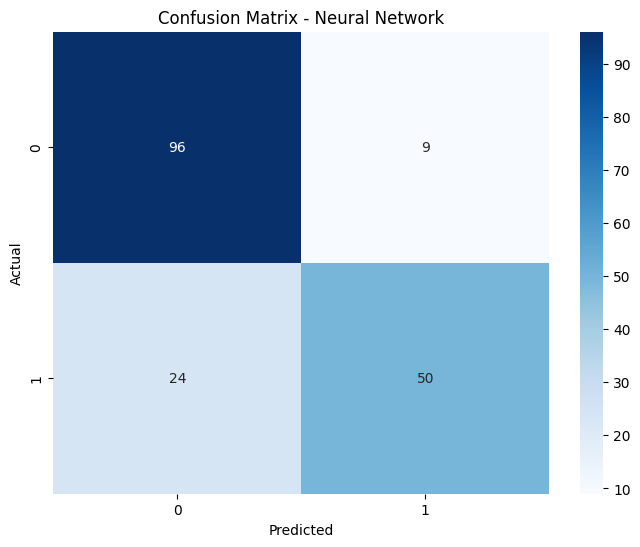


MAKING PREDICTIONS ON NEW DATA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
New Passenger Prediction:
Logistic Regression: Did not survive (Probability: 0.09)
Neural Network: Did not survive (Probability: 0.11)


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Load the Titanic dataset
df = pd.read_csv("z.csv")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Data exploration
print("\nMissing values:")
print(df.isnull().sum())
print("\nMissing values percentage:")
print((df.isnull().sum() / len(df)) * 100)

# Drop unnecessary columns
df.drop(columns=["Cabin", "Name", "PassengerId", "Ticket"], inplace=True)

# Handle categorical variables
sex = pd.get_dummies(df["Sex"], dtype=int)
embarked = pd.get_dummies(df["Embarked"], dtype=int)

# Combine with main dataframe
df = pd.concat([embarked, df], axis=1)
df = pd.concat([df, sex], axis=1)
df.drop(columns=["Sex", "Embarked"], inplace=True)

# Handle missing values in Age
age_mean = df["Age"].mean()
df["Age"] = df["Age"].fillna(value=age_mean)

# Feature scaling
from sklearn.preprocessing import MinMaxScaler

# Scale Age
age_scaler = MinMaxScaler()
df["Age"] = age_scaler.fit_transform(df[["Age"]])

# Scale Fare
fare_scaler = MinMaxScaler()
df["Fare"] = fare_scaler.fit_transform(df[["Fare"]])

print("\nFinal dataset shape:", df.shape)
print("\nFirst 5 rows after preprocessing:")
print(df.head())

# Split data
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n" + "="*50)
print("LOGISTIC REGRESSION")
print("="*50)

lor = LogisticRegression(max_iter=1000, random_state=42)
lor.fit(X_train, y_train)

y_pred_lor = lor.predict(X_test)
accuracy_lor = accuracy_score(y_test, y_pred_lor) * 100

print(f"Logistic Regression Accuracy: {accuracy_lor:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lor))

# Neural Network
import tensorflow as tf 
from keras import Sequential 
from keras.layers import Dense 
from keras.optimizers import Adam 
from keras.losses import binary_crossentropy

print("\n" + "="*50)
print("NEURAL NETWORK")
print("="*50)

# Build model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=binary_crossentropy,
    metrics=['accuracy']
)

print("Model Summary:")
model.summary()

# Train model
print("\nTraining Neural Network...")
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Make predictions
y_pred_nn = model.predict(X_test)
y_pred_nn_binary = np.where(y_pred_nn > 0.5, 1, 0).flatten()

accuracy_nn = accuracy_score(y_test, y_pred_nn_binary) * 100

print(f"Neural Network Accuracy: {accuracy_nn:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn_binary))

# Compare models
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(f"Logistic Regression Accuracy: {accuracy_lor:.2f}%")
print(f"Neural Network Accuracy: {accuracy_nn:.2f}%")

# Plot training history
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Feature importance for Logistic Regression
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(lor.coef_[0])
}).sort_values('importance', ascending=False)

print("\nFeature Importance (Logistic Regression):")
print(feature_importance)

# Confusion Matrix for Neural Network
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_nn_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Make predictions on new data (example)
print("\n" + "="*50)
print("MAKING PREDICTIONS ON NEW DATA")
print("="*50)

# Example: Create a new passenger data point
new_passenger = pd.DataFrame({
    'C': [0],
    'Q': [0], 
    'S': [1],
    'Pclass': [3],
    'Age': [0.27],  # Scaled age (around 22 years)
    'SibSp': [1],
    'Parch': [0],
    'Fare': [0.014],  # Scaled fare
    'female': [0],
    'male': [1]
})

# Ensure columns are in correct order
new_passenger = new_passenger[X.columns]

# Make predictions
lor_pred = lor.predict(new_passenger)[0]
lor_prob = lor.predict_proba(new_passenger)[0][1]

nn_pred = model.predict(new_passenger)[0][0]
nn_binary = 1 if nn_pred > 0.5 else 0

print(f"New Passenger Prediction:")
print(f"Logistic Regression: {'Survived' if lor_pred == 1 else 'Did not survive'} (Probability: {lor_prob:.2f})")
print(f"Neural Network: {'Survived' if nn_binary == 1 else 'Did not survive'} (Probability: {nn_pred:.2f})")